Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

---

Answer:

1. Definition

K-Nearest Neighbors (KNN) is a lazy, instance-based machine learning algorithm.

It does not build a model during training. Instead, it stores the training data and makes predictions based on similarity (distance) between data points.

2. How KNN Works

Given a new data point, KNN:

Calculates the distance between this point and all points in the training dataset.

Common distance metrics: Euclidean, Manhattan, Minkowski.

Selects the K closest points (neighbors).

Makes a prediction based on the neighbors’ information.

3. KNN for Classification

Goal: Predict the class label of a new point.

Steps:

Find the K nearest neighbors of the new point.

Count the frequency of each class among these neighbors.

Assign the most frequent class as the predicted label.

Example:

K = 3

Neighbors’ classes: [“Yes”, “No”, “Yes”]

Predicted class → “Yes” (majority vote)

4. KNN for Regression

Goal: Predict a continuous value for a new point.

Steps:

Find the K nearest neighbors.

Take the average (or weighted average) of their target values.

Assign this average as the predicted value.

Example:

K = 3

Neighbors’ values: [100, 120, 110]

Predicted value → (100 + 120 + 110)/3 = 110

---



---



Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?

---

Answer:

1. Definition

The Curse of Dimensionality refers to the problems that arise when data has a very high number of features (dimensions).

As the number of dimensions increases:

The volume of the feature space grows exponentially.

Data points become sparse and farther apart.

2. How it affects KNN

KNN relies on distance/similarity between points.

In high-dimensional spaces:

Distances between all points tend to become very similar.

The concept of a “nearest neighbor” becomes less meaningful.

Noise in irrelevant features can dominate distance calculations, reducing accuracy.

3. Consequences

Degraded performance: KNN predictions become less reliable.

Higher computational cost: More dimensions → more distance calculations.

Overfitting risk: Sparse high-dimensional data can lead to noisy neighbor selections.

4. Remedies

Feature selection: Keep only the most relevant features.

Dimensionality reduction: Use methods like PCA, t-SNE, or LDA.

Distance weighting: Give more weight to important features or closer neighbors.

5. Intuition

Imagine trying to find the nearest person in a 1D line → easy.

In 10D space, every point is “far away” from every other point, so “nearest” loses meaning.

---



---



Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?

---

Answer:

1. Definition of PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique.

It transforms original correlated features into a smaller set of uncorrelated features called principal components.

These components capture the maximum variance in the data.

2. How PCA Works

Compute the covariance matrix of the features.

Calculate eigenvalues and eigenvectors of the covariance matrix.

Rank the eigenvectors by descending eigenvalues (variance explained).

Select the top K eigenvectors → form principal components.

Transform the original data into this new lower-dimensional space.

3. Key Characteristics

Unsupervised: Does not use the target variable.

Linear transformation: Principal components are linear combinations of original features.

Reduces dimensionality while retaining most of the variance in the data.

---



---



Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?

---

Answer:

1. Definition of Eigenvectors and Eigenvalues

Eigenvectors are directions in the feature space along which the data varies the most.

Eigenvalues are scalars that measure the magnitude of variance along their corresponding eigenvectors.

In simple terms:

Eigenvector → direction of maximum spread

Eigenvalue → how much variance exists in that direction

2. Role in PCA

PCA starts by computing the covariance matrix of the data.

Then it solves the equation:

Covariance Matrix
⋅
Eigenvector
=
Eigenvalue
⋅
Eigenvector
Covariance Matrix⋅Eigenvector=Eigenvalue⋅Eigenvector

Each eigenvector points in a direction of data variation.

Each eigenvalue tells us how important that direction is.

PCA ranks eigenvectors by descending eigenvalues.

The top K eigenvectors (with largest eigenvalues) form the principal components, capturing the majority of the variance.

3. Importance

Eigenvectors define the new axes (principal components) for the reduced feature space.

Eigenvalues help determine how many components to keep, based on variance explained.

Together, they allow PCA to:

Reduce dimensionality

Remove redundancy and correlated features

Retain most of the information in the dataset

4. Intuition

Imagine data as an elongated cloud of points in 3D space:

Eigenvector 1 → points along the longest axis of the cloud (most variance)

Eigenvector 2 → next orthogonal direction with next highest variance

Eigenvector 3 → least variance direction

Eigenvalues tell us how “important” each axis is.

---



---



Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?

---

Answer:

1. KNN Recap

K-Nearest Neighbors (KNN) is a distance-based algorithm.

It predicts labels (classification or regression) based on the nearest neighbors in the feature space.

Performance depends heavily on feature scaling and the dimensionality of the data.

2. PCA Recap

Principal Component Analysis (PCA) is a dimensionality reduction technique.

It transforms high-dimensional data into lower-dimensional uncorrelated components while retaining most of the variance.

3. Why Combine PCA with KNN

Curse of Dimensionality:

KNN suffers in high-dimensional spaces because distances become less meaningful.

PCA reduces dimensions → distances between points become more meaningful.

Noise Reduction:

PCA filters out low-variance/noisy features → KNN focuses on the most informative features.

Computational Efficiency:

Lower-dimensional data → fewer distance calculations → faster KNN predictions.

4. How the Pipeline Works

Apply PCA to the training data → reduce dimensionality.

Transform test data using the same PCA components.

Apply KNN on the PCA-transformed data → predict labels.

5. Intuition

Think of PCA as a lens that highlights the most important patterns in the data.

KNN then compares points through this clearer lens, making neighbor selection more accurate.

6. Example Use Case

Dataset: High-dimensional image data (e.g., MNIST digits)

Step 1: PCA reduces 784 pixel features → top 50 components

Step 2: KNN predicts the digit based on neighbors in 50-dimensional space

Result: Faster and often more accurate classification than raw 784-dimensional KNN

---



---



Dataset:
Use the Wine Dataset from sklearn.datasets.load_wine().

Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.
(Include your Python code and output in the code box below.)

---



In [1]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ----- Case 1: KNN without feature scaling -----
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Accuracy without feature scaling:", round(acc_no_scaling, 4))

# ----- Case 2: KNN with feature scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy with feature scaling:", round(acc_scaled, 4))


Accuracy without feature scaling: 0.7222
Accuracy with feature scaling: 0.9444


Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.
(Include your Python code and output in the code box below.)

---



In [2]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each principal component
print("Explained variance ratio of each principal component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

# Optional: cumulative explained variance
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC1 to PC{i+1}: {cum_var:.4f}")


Explained variance ratio of each principal component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080

Cumulative explained variance:
PC1 to PC1: 0.3620
PC1 to PC2: 0.5541
PC1 to PC3: 0.6653
PC1 to PC4: 0.7360
PC1 to PC5: 0.8016
PC1 to PC6: 0.8510
PC1 to PC7: 0.8934
PC1 to PC8: 0.9202
PC1 to PC9: 0.9424
PC1 to PC10: 0.9617
PC1 to PC11: 0.9791
PC1 to PC12: 0.9920
PC1 to PC13: 1.0000


Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.
(Include your Python code and output in the code box below.)

---



In [3]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----- Case 1: KNN on original data with scaling -----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on original dataset:", round(acc_original, 4))

# ----- Case 2: KNN on PCA-transformed data (top 2 components) -----
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed dataset (2 PCs):", round(acc_pca, 4))


Accuracy on original dataset: 0.9444
Accuracy on PCA-transformed dataset (2 PCs): 0.9444


Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.
(Include your Python code and output in the code box below.)

---



In [4]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Case 1: KNN with Euclidean distance -----
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
print("Accuracy with Euclidean distance:", round(acc_euclidean, 4))

# ----- Case 2: KNN with Manhattan distance -----
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Accuracy with Manhattan distance:", round(acc_manhattan, 4))


Accuracy with Euclidean distance: 0.9444
Accuracy with Manhattan distance: 0.9815


Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data
(Include your Python code and output in the code box below.)

---

Answer:

Step 1: Use PCA to Reduce Dimensionality

PCA (Principal Component Analysis) transforms the original high-dimensional data into a lower-dimensional space while preserving as much variance as possible. This reduces overfitting and improves computational efficiency.

Step 2: Decide How Many Components to Keep

Common strategies:

Variance Explained Threshold: Keep enough components to explain, e.g., 90–95% of the variance.

Elbow Method: Plot cumulative variance and look for a "knee" where adding more components gives diminishing returns.

Step 3: Use KNN for Classification Post-Dimensionality Reduction

Once dimensionality is reduced, KNN can classify patients. PCA helps because KNN works better in lower dimensions (avoiding the curse of dimensionality).

Step 4: Evaluate the Model

Train/test split or cross-validation

Metrics: Accuracy, F1-score, Confusion Matrix (especially important in imbalanced biomedical datasets)

Step 5: Justify the Pipeline to Stakeholders

PCA reduces noise, enhances generalizability, and mitigates overfitting.

KNN is simple, interpretable, and widely understood.

The pipeline has clear steps: dimensionality reduction → classification → evaluation.

Cross-validation ensures robust, real-world performance estimates.

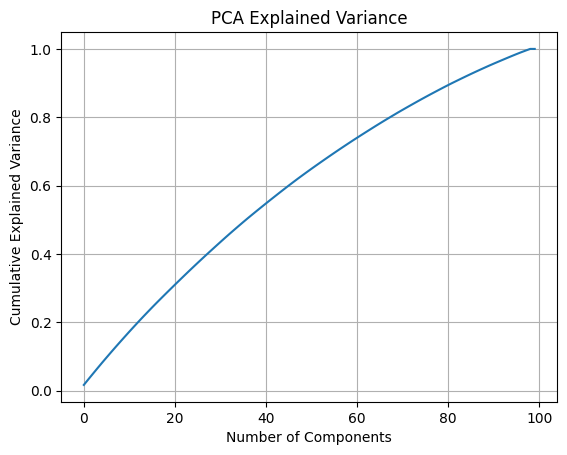

Number of components to keep: 82
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.36      0.67      0.47         6
           2       0.50      0.14      0.22         7

    accuracy                           0.40        20
   macro avg       0.43      0.41      0.37        20
weighted avg       0.43      0.40      0.37        20

Confusion Matrix:
 [[3 4 0]
 [1 4 1]
 [3 3 1]]
5-fold Cross-Validation Accuracy: 0.40 ± 0.11


In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Example: Load gene expression dataset
# X = gene expression features (samples x genes)
# y = cancer type labels
# For demonstration, we'll simulate a dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=1000, n_informative=50, n_classes=3, random_state=42)

# Step 1: Standardize features (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 2b: Decide number of components
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Choose number of components to explain ~90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of components to keep: {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Step 3b: KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Cross-validation for robust evaluation
cv_scores = cross_val_score(knn, X_reduced, y, cv=5)
print(f"5-fold Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")
